<a href="https://colab.research.google.com/github/WBrunoSilva/data-ebac/blob/main/tensorflow_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
import tensorflow_datasets as tfds
(x_treino,y_treino),(x_teste,y_teste)=tfds.as_numpy(
	tfds.load('mnist',
			split=['train', 'test'],
			batch_size=-1,
			as_supervised=True,
			shuffle_files=True
			))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.FW71N4_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.FW71N4_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


O dígito na imagem: 4


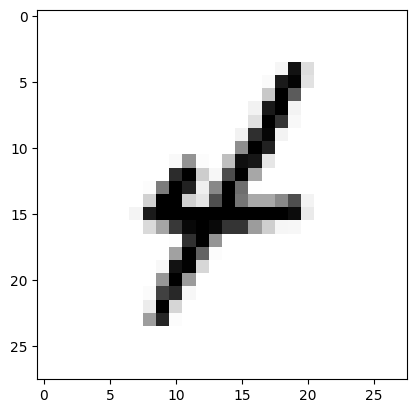

In [7]:
import matplotlib.pyplot as plt
img_index = 8888
print('O dígito na imagem:', y_treino[img_index])
plt.imshow(x_treino[img_index].reshape(28,28),cmap='Greys')

In [8]:
x_treino.shape

(60000, 28, 28, 1)

In [9]:
x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')
x_treino /= 255
x_teste/=255
print('Quantidade de imagens em x_treino',x_treino.shape[0])
print('quantidade de imagens em x_teste',x_teste.shape[0])

Quantidade de imagens em x_treino 60000
quantidade de imagens em x_teste 10000


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, Dropout,Flatten,MaxPooling2D

model = Sequential()
model.add(Conv2D(28,kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))


In [29]:
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_treino, y=y_treino, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.8846 - loss: 0.3819
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9694 - loss: 0.0949
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9804 - loss: 0.0607
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9849 - loss: 0.0471
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9886 - loss: 0.0336
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9904 - loss: 0.0292
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9901 - loss: 0.0264
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9923 - loss: 0.0226
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.9937 - loss: 0.0193
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9947 - loss: 0.0164


In [30]:
model.evaluate(x_teste,y_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9858 - loss: 0.0563


[0.06176714599132538, 0.9848999977111816]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Nosso modelo CNN prevê que o dígito na imagem é: 3


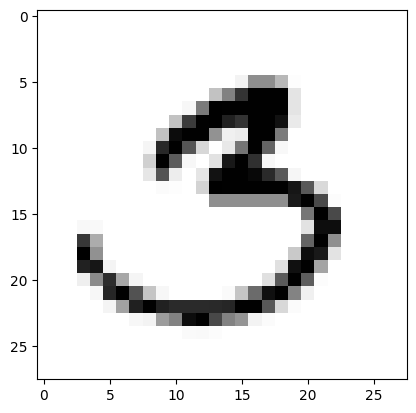

In [41]:
img_pred_index = 6000
plt.imshow(x_teste[img_pred_index].reshape(28,28),cmap='Greys')
pred = model.predict(x_teste[img_pred_index].reshape(1,28,28,1))
print("Nosso modelo CNN prevê que o dígito na imagem é:", pred.argmax())

In [43]:
!mkdir -p modelo_salvo
model.save('modelo_salvo/classificador_digitos.keras')